In [14]:
%pip install seaborn -q


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
)
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("Dataset/student_performance_cleaned.csv")
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()
df["Participation in Extracurricular Activities"] = df["Participation in Extracurricular Activities"].map({"Yes": 1, "No": 0})

# --- Replace remaining Yes/No (safety) ---
df = df.replace({"Yes": 1, "No": 0}).infer_objects(copy=False)

# --- Feature Engineering ---
df["Engagement_Score"] = df["Attendance Rate"] * (1 + df["Participation in Extracurricular Activities"])
df["Study_Efficiency"] = df["Previous Grades"] / (df["Study Hours per Week"] + 0.001)
df["Consistency"] = (df["Attendance Rate"] + df["Previous Grades"]) / 2
df["Time_Tradeoff"] = df["Study Hours per Week"] * (1 - df["Attendance Rate"])

# --- Define Features and Target ---
X = df.drop(columns=["Student ID", "Passed"])
y = df["Passed"]

# --- Split Dataset ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
print(y_train.value_counts())


Dataset loaded successfully!
Shape: (30986, 6)
Training samples: 24788, Testing samples: 6198
Passed
0    12406
1    12382
Name: count, dtype: int64


In [16]:
# Model 1: Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]
print("=== Logistic Regression Evaluation ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_prob):.3f}")

=== Logistic Regression Evaluation ===
Accuracy : 0.486
Precision: 0.483
Recall   : 0.424
F1 Score : 0.452
ROC-AUC  : 0.489


In [17]:
#  Model 2: Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=4,
    min_samples_leaf=2,
    class_weight='balanced_subsample',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
print("=== Random Forest Evaluation ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred_rf):.3f}")
print(f"F1 Score : {f1_score(y_test, y_pred_rf):.3f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_prob_rf):.3f}")

=== Random Forest Evaluation ===
Accuracy : 0.505
Precision: 0.504
Recall   : 0.522
F1 Score : 0.513
ROC-AUC  : 0.503


In [18]:
# Model 3: Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=4,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)
y_prob_et = et.predict_proba(X_test)[:, 1]

print("=== Extra Trees Evaluation ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred_et):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_et):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred_et):.3f}")
print(f"F1 Score : {f1_score(y_test, y_pred_et):.3f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_prob_et):.3f}")


=== Extra Trees Evaluation ===
Accuracy : 0.494
Precision: 0.494
Recall   : 0.506
F1 Score : 0.500
ROC-AUC  : 0.494


=== Model Performance Comparison ===


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.485641,0.483076,0.424096,0.451668
1,Random Forest,0.504840,0.504215,0.521641,0.512780
2,Extra Trees,0.493869,0.493539,0.505814,0.499601


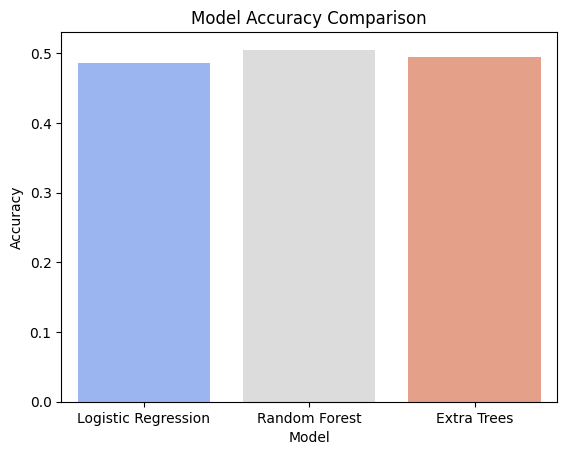

In [19]:
# Cell 5 – Model Performance Comparison and Visualization
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Extra Trees"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_et),
    ],
    "Precision": [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_et),
    ],
    "Recall": [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_et),
    ],
    "F1-Score": [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_et),
    ]
})
print("=== Model Performance Comparison ===")
display(results)
sns.barplot(x="Model", y="Accuracy", data=results, palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.show()
